In [8]:
import pandas as pd      #import the libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('data.csv')   #read the data set

In [10]:
data.head() #read the data set

,ID,Study,Group,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0,GaPt03,Ga,PD,female,82,1.45,50,3.0,20,10,36.34,0.6635,0.778
1,GaPt04,Ga,PD,male,68,1.71,78,2.5,25,8,11.00,0.6420,0.818
2,GaPt05,Ga,PD,female,82,1.53,51,2.5,24,5,14.50,0.9080,0.614
3,GaPt06,Ga,PD,male,72,1.70,82,2.0,16,13,10.47,0.8480,0.937
4,GaPt07,Ga,PD,female,53,1.67,54,3.0,44,22,18.34,0.6770,0.579


In [11]:
Grou=pd.get_dummies(data['Group'],drop_first=True)   #group(Ga,Ju,Si) is converted into numerical values
data.drop(['Speed_10','Group'],axis=1,inplace=True) #remove the unnecessary coloumn
data = pd.concat([data,Grou],axis=1) #The new numerical features were replaced

Text(0.5, 1.0, 'Correlation respect to PD Patients Group')

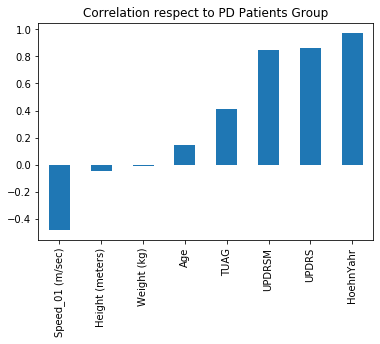

In [69]:
data.corr()['PD'][:-1].sort_values().plot(kind = 'bar') #plot the correlation as a bar chart
plt.title('Correlation respect to PD Patients Group')

In [70]:
data.drop(['ID'],axis=1,inplace=True) #remove the unnecessary coloumn

In [71]:
Gend = pd.get_dummies(data['Gender'],drop_first=True)  #gender is converted into numerical values

In [72]:
Stud=pd.get_dummies(data['Study'])  #study is converted into numerical values

In [73]:
data.drop(['Gender','Study'],axis=1,inplace=True)  #drop the features to convert into numerical values

In [74]:
data = pd.concat([data,Gend,Stud],axis=1) #The new numerical features were replaced

In [75]:
data.drop(['Weight (kg)','HoehnYahr','UPDRS','UPDRSM'],axis = 1,inplace = True) #drop the unnecessary features

In [76]:
X = data.drop(['PD'], axis = 1) #define the features as X 

In [77]:
y = data['PD'] #define the label as Y

In [78]:
from sklearn.model_selection import train_test_split  #import the data selection libraries

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)  #data seperation for training testing

In [80]:
#Normalization

In [81]:
min_train = X_train.min() #get the minimum values of training features

In [82]:
range_train = (X_train-min_train).max()  #get range of the data features

In [83]:
X_train_scaled = (X_train-min_train)/range_train #normalizing the features

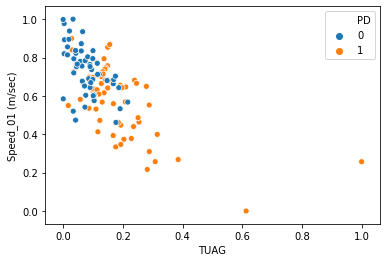

In [84]:
sns.scatterplot( x = X_train_scaled['TUAG'], y =X_train_scaled ['Speed_01 (m/sec)'],hue = 'PD', data = data) #viasualize the particular faetures after normalization

In [85]:
min_test = X_test.min()     #normalizing the testing features
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [86]:
from tensorflow.keras.models import Sequential  #import tensorflow and keras libraries
from tensorflow.keras.layers import Dense,Dropout  #import dropout function

In [87]:
help(Sequential)  #structure of the sequential function

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

In [88]:
help(Dense) #structure of the dense function

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:


In [89]:
model = Sequential() #define the model as sequential

model.add(Dense(16, input_shape=(8,),activation = 'relu')) #dense layer input
model.add(Dropout(0.2)) #dropout unit

model.add(Dense(16,activation = 'relu'))  #dense layer hidden unit
model.add(Dropout(0.2))  #dropout unit

model.add(Dense(8,activation = 'relu')) #dense layer hidden unit
model.add(Dropout(0.2))  #dropout unit

#Binary calssification  
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'adam',loss = 'binary_crossentropy') #train the model

In [90]:
model.summary()  #develop model structure

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [91]:
import pydot #import the pydot library

In [92]:
import graphviz  #import the graphviz library

In [93]:
from tensorflow.keras.utils import plot_model #plotting the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [94]:
from tensorflow.keras.callbacks import EarlyStopping #import the early stopping and callbacks fuction

In [95]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)  #define the parameters of early stopping fuction

In [96]:
model.fit(x = X_train_scaled, y = y_train, epochs= 250, validation_data=(X_test_scaled,y_test),
         callbacks=[early_stop])   #train the model

Train on 116 samples, validate on 50 samples
Epoch 1/250
116/116 [==============================] - 1s 13ms/sample - loss: 0.7066 - val_loss: 0.6949
Epoch 2/250
116/116 [==============================] - 0s 263us/sample - loss: 0.7038 - val_loss: 0.6936
Epoch 3/250
116/116 [==============================] - 0s 295us/sample - loss: 0.7038 - val_loss: 0.6914
Epoch 4/250
116/116 [==============================] - 0s 284us/sample - loss: 0.6853 - val_loss: 0.6895
Epoch 5/250
116/116 [==============================] - 0s 283us/sample - loss: 0.7132 - val_loss: 0.6884
Epoch 6/250
116/116 [==============================] - 0s 258us/sample - loss: 0.6927 - val_loss: 0.6879
Epoch 7/250
116/116 [==============================] - 0s 234us/sample - loss: 0.6965 - val_loss: 0.6875
Epoch 8/250
116/116 [==============================] - 0s 270us/sample - loss: 0.7000 - val_loss: 0.6867
Epoch 9/250
116/116 [==============================] - 0s 276us/sample - loss: 0.7017 - val_loss: 0.6858
Epoch 10/25

Epoch 78/250
116/116 [==============================] - 0s 305us/sample - loss: 0.6465 - val_loss: 0.6190
Epoch 79/250
116/116 [==============================] - 0s 304us/sample - loss: 0.6622 - val_loss: 0.6174
Epoch 80/250
116/116 [==============================] - 0s 290us/sample - loss: 0.6554 - val_loss: 0.6159
Epoch 81/250
116/116 [==============================] - 0s 346us/sample - loss: 0.6584 - val_loss: 0.6152
Epoch 82/250
116/116 [==============================] - 0s 258us/sample - loss: 0.6798 - val_loss: 0.6154
Epoch 83/250
116/116 [==============================] - 0s 332us/sample - loss: 0.6371 - val_loss: 0.6149
Epoch 84/250
116/116 [==============================] - 0s 296us/sample - loss: 0.6419 - val_loss: 0.6136
Epoch 85/250
116/116 [==============================] - 0s 280us/sample - loss: 0.6712 - val_loss: 0.6128
Epoch 86/250
116/116 [==============================] - 0s 309us/sample - loss: 0.6507 - val_loss: 0.6118
Epoch 87/250
116/116 [========================

Epoch 155/250
116/116 [==============================] - 0s 405us/sample - loss: 0.5799 - val_loss: 0.5462
Epoch 156/250
116/116 [==============================] - 0s 399us/sample - loss: 0.5757 - val_loss: 0.5451
Epoch 157/250
116/116 [==============================] - 0s 377us/sample - loss: 0.5893 - val_loss: 0.5434
Epoch 158/250
116/116 [==============================] - 0s 396us/sample - loss: 0.6521 - val_loss: 0.5422


In [97]:
model.metrics_names #grasp the loss values with time promptly

['loss']

In [98]:
model_loss = pd.DataFrame(model.history.history) #create dataframe using loss values

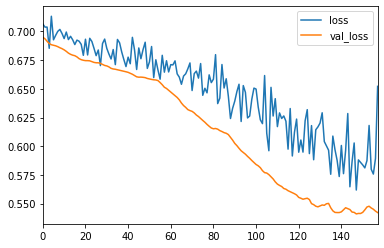

In [99]:
model_loss.plot() #plot the loss

In [101]:
predictions = model.predict_classes(X_test_scaled) #test the model

In [102]:
from sklearn.metrics import classification_report,confusion_matrix #import the performance evaluavtion matrices

In [103]:
print(classification_report(y_test,predictions)) #print the performance of the algorithm
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        20
           1       0.72      0.87      0.79        30

    accuracy                           0.72        50
   macro avg       0.72      0.68      0.69        50
weighted avg       0.72      0.72      0.71        50

[[10 10]
 [ 4 26]]


(2, 0)

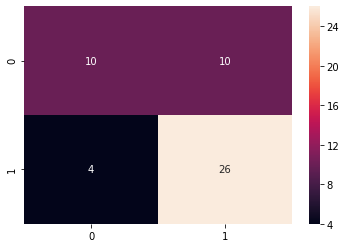

In [104]:
cm = confusion_matrix(y_test,predictions) #define the confusion matrix as cm
sns.heatmap(cm, annot=True)  #visualize the confusion matrix
plt.ylim(2,0)
